In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

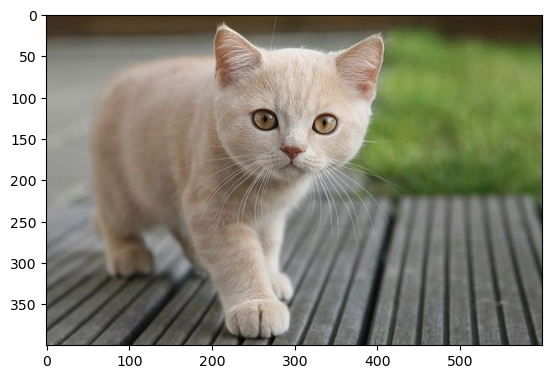

In [2]:
# Read in the image
image = cv2.imread('cat.jpg')
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

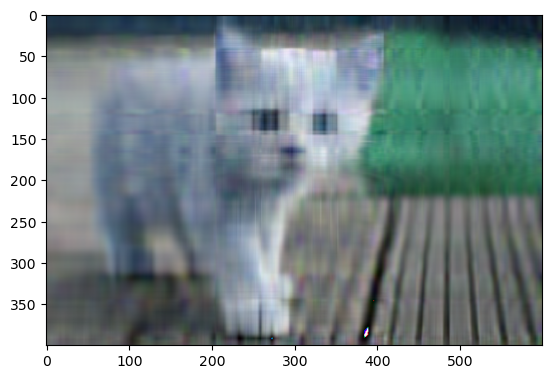

In [6]:
# Splitting the image into R, G, B arrays
blue, green, red = cv2.split(image)

# Initialize PCA with the desired number of principal components
pca = PCA(n_components=10)

# Apply PCA to each color channel separately and then apply inverse transform to the transformed channels
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)

green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)

blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

# Combine the channels back into a single image
img_compressed = np.dstack((red_inverted, green_inverted, blue_inverted)).astype(np.uint8)

# View the compressed image
plt.imshow(img_compressed)

In [4]:
# Комбінування каналів для стиснутого зображення
compressed_image = np.dstack((red_inverted, green_inverted, blue_inverted)).astype(np.uint8)

# Збереження стиснутого зображення в файл
cv2.imwrite('compressed_cat.jpg', cv2.cvtColor(compressed_image, cv2.COLOR_RGB2BGR))

True